# Practice Lab

In the lab, we are going to get the basic insights on a dataset on "laptop pricing". 

## Objective: 

* Handle missing data in different ways
* Correct the data type of different data values as per requirement
* standardize and normalixse the appropriate data attributes
* Visualize the data as grouped bar graph using bininng
* Converting a categorical data inito numerical indicator variable

### Required libraries import

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### File available in the below url:
https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv

### Load the datset using above url

In [70]:
file_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv'

In [71]:
df = pd.read_csv(file_url, header = 0)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


#### Dataframe summary

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


Looking at the above code, in the column "Screen_Size_cm": we can round the number with 2. 

#### Rounding the column 'Screen_Size_cm'

In [73]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']], 2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


### Evaluate the data for missing value

In [74]:
df.isna().sum()

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

Missing values in the: 

Screen size = 4

Weight_kg = 5

In [75]:
screen_size_mean = df['Screen_Size_cm'].replace(np.nan, df['Screen_Size_cm'].mean())
df['Screen_Size_cm'].head()

0    35.56
1    39.62
2    39.62
3    33.78
4    39.62
Name: Screen_Size_cm, dtype: float64

In [76]:
avg_weight = df['Weight_kg'].replace(np.nan, df['Weight_kg'].mean(axis= 0), inplace = True)

/tmp/ipykernel_4956/2508133106.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  avg_weight = df['Weight_kg'].replace(np.nan, df['Weight_kg'].mean(axis= 0), inplace = True)


#### Replace with the most frequent value

In [77]:
# replacing missing data with mode for Screen size cm

most_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df['Screen_Size_cm'].replace(np.nan, most_screen_size, inplace= True)

/tmp/ipykernel_4956/3534077002.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Screen_Size_cm'].replace(np.nan, most_screen_size, inplace= True)


## Data Standardisation

The value of Screen_size has a standard unit of inches. 

The weight of the laptop is needed to be in pounds. 

1 inch = 2.54 cm

1 kg = 2.205 pounds

In [78]:
# convert weight from kg to pounds

df['Weight_kg'] = df['Weight_kg'] * 2.025
df.rename(columns={'Weight_kg' : 'Weight_pounds'}, inplace= True)


In [79]:
# Convert screen size to inch from cm

df['Screen_Size_cm'] = df['Screen_Size_cm'] / 2.54

df.rename(columns= {'Screen_Size_cm': 'Screen_size_inch'}, inplace = True)


In [80]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.24000,978
1,1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.45500,634
2,2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.45500,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.47050,1244
4,4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,3.86775,837


## Data Normalization

Normalize the continous data. 

In [81]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = ['Screen_size_inch','Weight_pounds']

scaler = MinMaxScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,0.377415,1.6,8,256,0.283154,978
1,1,Dell,3,Full HD,1,1,3,0.679049,2.0,4,256,0.498208,634
2,2,Dell,3,Full HD,1,1,7,0.679049,2.7,8,256,0.498208,946
3,3,Dell,4,IPS Panel,2,1,5,0.245171,1.6,8,128,0.146953,1244
4,4,HP,4,Full HD,2,1,7,0.679049,1.8,8,256,0.394265,837


### Bining

COnvert price attribute to three categories: 'Low', "medium", and "high"

In [82]:
df['Price'].unique()

array([ 978,  634,  946, 1244,  837, 1016, 1117,  866,  812, 1068,  975,
        558,  527, 1195,  876, 1213, 1105, 1392, 1092,  888,  761, 2095,
       1518, 1333,  616,  733,  913, 1421, 1515, 1880, 2069, 1420, 1179,
       1123,  727, 1255, 1418, 1396, 1374,  786, 1023,  925, 1371, 1085,
       1714, 1172, 1777, 1256, 1327, 1841, 1184, 1310, 1460,  860, 1731,
       1057,  977, 1091, 1142, 1075, 3810,  892, 1206, 1118,  934, 1053,
        735, 1208, 1394, 1241, 2323,  939, 3665, 1325, 1269, 1245, 1641,
       1390, 1334, 1696, 1198, 1611, 1453, 1452, 2006, 1656, 2208, 1813,
       1200, 2223,  697, 2712,  989, 1562, 1192, 1905, 1544, 1283,  710,
        951, 1815, 1498, 1306, 2509, 1709, 2655, 2340, 3059, 2124,  922,
       1286, 1157, 1129, 1626, 1702, 1749, 1739, 1013,  935,  896, 1419,
        800, 1054, 1953, 2125, 1872, 2240, 1548,  723, 1861, 2312, 1167,
       3301, 1541, 2012, 1842, 1561, 1598, 1442, 1650, 1268, 1236, 1010,
       1513, 1383, 1089, 1524, 1904, 1219, 3073, 19

In [61]:
bins = np.linspace(min(df['Price']), max(df['Price']), 4)
bins

array([ 527.        , 1621.33333333, 2715.66666667, 3810.        ])

In [62]:
group_names = ['low', 'medium', 'high']

In [84]:
df['Price_bined'] = pd.cut(df['Price'], bins, group_names,include_lowest= True)


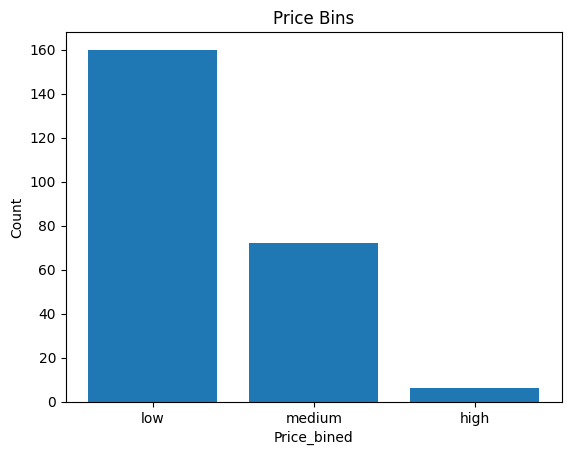

In [86]:
plt.bar(group_names, df['Price_bined'].value_counts())
plt.xlabel('Price_bined')
plt.ylabel('Count')
plt.title('Price Bins')
plt.show()

### Indicator variables

In [89]:
df['Screen'].unique()

array(['IPS Panel', 'Full HD'], dtype=object)

In the column "Screen", there are two indicator variables. 

a. IPS Panel

b. Full HD

In [90]:
# Label the categories

dummy_var = pd.get_dummies(df['Screen'])
dummy_var.head()

,Full HD,IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [92]:
# rename above

dummy_var.rename(columns={'Full HD' : 'Full_HD_Screen', 'IPS Panel': 'IPS_Panel_Screen'}, inplace= True)
dummy_var

,Full_HD_Screen,IPS_Panel_Screen
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False
...,...,...
233,False,True
234,True,False
235,False,True
236,True,False


In [93]:
# merge in the orignal dataframe and remove the screen column

df = pd.concat([df, dummy_var], axis= 1)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price_bined,Full_HD_Screen,IPS_Panel_Screen
0,0,Acer,4,IPS Panel,2,1,5,0.377415,1.6,8,256,0.283154,978,"(526.999, 1621.333]",False,True
1,1,Dell,3,Full HD,1,1,3,0.679049,2.0,4,256,0.498208,634,"(526.999, 1621.333]",True,False
2,2,Dell,3,Full HD,1,1,7,0.679049,2.7,8,256,0.498208,946,"(526.999, 1621.333]",True,False
3,3,Dell,4,IPS Panel,2,1,5,0.245171,1.6,8,128,0.146953,1244,"(526.999, 1621.333]",False,True
4,4,HP,4,Full HD,2,1,7,0.679049,1.8,8,256,0.394265,837,"(526.999, 1621.333]",True,False


In [94]:
df.drop('Screen', axis= 1, inplace= True)
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price_bined,Full_HD_Screen,IPS_Panel_Screen
0,0,Acer,4,2,1,5,0.377415,1.6,8,256,0.283154,978,"(526.999, 1621.333]",False,True
1,1,Dell,3,1,1,3,0.679049,2.0,4,256,0.498208,634,"(526.999, 1621.333]",True,False
2,2,Dell,3,1,1,7,0.679049,2.7,8,256,0.498208,946,"(526.999, 1621.333]",True,False
3,3,Dell,4,2,1,5,0.245171,1.6,8,128,0.146953,1244,"(526.999, 1621.333]",False,True
4,4,HP,4,2,1,7,0.679049,1.8,8,256,0.394265,837,"(526.999, 1621.333]",True,False
